## Vector Similarity 

#### This topic is not related to the below notebook code, but just for theory purpose.

1.  ***L2 Norm***
* Also called Euclidean norm.

* Measures the length (magnitude) of a vector.

* Formula:
        |v| = sqrt(v1^2 + v2^2 +....vn^2)
    
* Example:
    * for v = [3,4], L2 norm = 5
    * therefore v = [3/5, 4/5] = [0.6, 0.8] -> L2 normalization is applied here.

* *Use case:* Normalize vectors so their length = 1.

2. ***Cosine Similarity***
* Measures the cosine of the angle between two vectors.

* Captures directional similarity, ignoring magnitude.

* Formula:
    cos(theta) = A.B / |A|.|B|
 
* Range:

    * +1 = same direction (most similar)

    * 0 = orthogonal (no similarity)

    * -1 = opposite direction

3. ***Cosine Distance***
* Measures how different two vectors are in direction.

* Formula:
    Cosine Distance = 1 - Cosine Similarity

* Range:

    * 0 = same direction

    * 1 = orthogonal

    * 2 = opposite
 
4. ***Euclidean Distance***
* Measures straight-line distance between vector endpoints.

* Sensitive to both length and direction.
 
* Example:

For A = [3,0], B = [0,4], distance = 5.

5. When Euclidean Distance is Related to Cosine Distance
If vectors are L2-normalized (length=1):
```python
    |A - B| = 2(1 - cos(theta))
```

* This means:

    * Euclidean distance directly corresponds to cosine similarity.

    * In this case, they encode the same information about angle.

* If vectors are not normalized:

    * Euclidean distance increases with vector length.

    * Cosine similarity stays unchanged (still based on angle).
 
* Important Note:

* Even when vectors are L2-normalized:

    * Euclidean distance and cosine distance are not equal.

    * They are monotonically related via this formula:
 
```python
    |A - B| = 2(1 - cos(theta))
```
 
    * So they will produce the same similarity ranking but not the same numeric values.

In [1]:
import numpy as ap
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [5]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to C:\Users\Deepam
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Deepam
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Deepam Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [15]:
import pandas as pd
import pathlib

root_dir = pathlib.Path(r"D:\Deepam\bbc")

data = []

for category_dir in root_dir.iterdir():
    if category_dir.is_dir():
        label = category_dir.name

        for file_path in category_dir.glob("*.txt"):
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()
                data.append({"text": text, "labels": label})

df = pd.DataFrame(data)

In [16]:
print(df.head())

                                                text    labels
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business


In [17]:
inputs = df['text']
labels = df['labels']

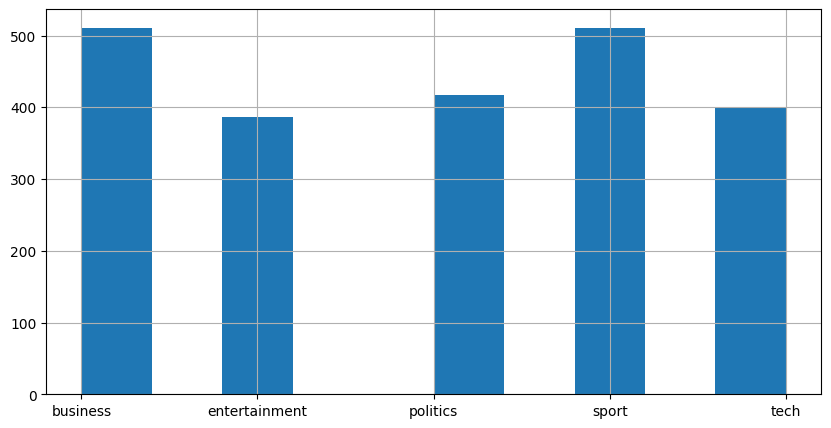

In [20]:
labels.hist(figsize=(10,5)); # to check if we have imbalanced dataset

In [21]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

In [26]:
vectorizer = CountVectorizer()

### What is CountVectorizer?
* CountVectorizer is a tool from scikit-learn that:
* Turns text into numbers by counting how many times each word appears.

In [25]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [46]:
Xtrain.shape

(1668, 52144)

In [24]:
Xtrain

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 337411 stored elements and shape (1668, 26287)>

In [28]:
(Xtrain != 0).sum().item()

337411

In [33]:
# What percentage of values are non-zero?
((Xtrain != 0).sum().item()/ np.prod(Xtrain.shape)).item()

0.007695239935415004

In [35]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9922062350119905
test score: 0.9712746858168761


In [53]:
# Stopwords are words in a language that are very common but carry little meaning
# on their own.
# "the", "is", "in", "a", "an", "on", "and", "of", "for", "to", "with", "that"

# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
Xtrain.shape

(1668, 25995)

In [54]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9928057553956835
test score:  0.9766606822262118


In [38]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [39]:
class LemmaTokenizer:
    def __init__ (self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens) # This returns a list containing tuples, and each tuple contains eachword in the document, along with its corresponding tag. 
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
                for word, tag in words_and_tags]

In [47]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
Xtrain.shape

C:\Users\Deepam Shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1668, 25894)

In [48]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9922062350119905
test score:  0.9676840215439856


In [41]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [49]:
# with stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
Xtrain.shape

C:\Users\Deepam Shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1668, 22714)

In [50]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9892086330935251
test score:  0.9694793536804309


In [44]:
def simple_tokenizer(s):
    return s.split()

In [51]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
Xtrain.shape

C:\Users\Deepam Shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1668, 52144)

In [52]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9952038369304557
test score:  0.9712746858168761


### What is the vector dimensionality in each case?

#### The Xtrain shape for:-

1. CountVectorizer:
    * (1668, 52144)
2. Stopwords:
    * (1668, 25995)
3. Lemmatization:
    * (1668, 25894)
4. Stemming:
    * (1668, 22714)
5. Simple_tokenzier:
    * (1668, 52144)

### Compare them and consider why they are larger / smaller

* All your tokenizers were applied to the same 1668 training samples, so the first dimension stays 1668.

* But the second dimension (number of unique tokens) varies depending on:

    * Whether you lowercased or not

    * Whether you removed stopwords

    * Whether you lemmatized/stemmed

    * Whether you used n-grams
 

1. ***CountVectorizer*** (default)

* Default tokenizer:

    * Lowercases

    * Splits on whitespace/punctuation

    * Keeps stopwords

    * No lemmatization or stemming

* Tokens:

```python
sentence = "The cats are running and playing in the gardens."


Copy code
['the', 'cats', 'are', 'running', 'and', 'playing', 'in', 'the', 'gardens']
Unique words across all documents in your corpus → very large vocabulary.
that’s why:


Copy code
(1668, 52144)
Here: 52,144 unique words.
```

2. ***Stopwords removed***

* Same tokenizer as default, but stopwords like `the`, `are`, `and`, `in` removed.

```python
sentence = "The cats are running and playing in the gardens."

Tokens:
['cats', 'running', 'playing', 'gardens']

Across all documents, a lot of very common words (stopwords) disappear.
Vocabulary shrinks dramatically.

Example reduction:

scss
Copy code
(1668, 25995)
Fewer unique tokens.
```

3. ***Lemmatization***
   
* Your LemmaTokenizer:

    * Lowercases

    * POS tags

    * Lemmatizes

Example transformations:

```python
sentence = "The cats are running and playing in the gardens."

'cats' → 'cat'
'running' → 'run'
'gardens' → 'garden'
Tokens:
['the', 'cat', 'be', 'run', 'and', 'play', 'in', 'the', 'garden']

Notice:

cats → cat
running → run
gardens → garden

This reduces the vocabulary further because multiple forms merge into one.

Example:
(1668, 25894)
Even smaller than stopwords-only because you normalize word forms.
```

4. ***Stemming***

* Simple stemming with PorterStemmer or SnowballStemmer.

Example transformations:

```python
sentence = "The cats are running and playing in the gardens."

'cats' → 'cat'
'running' → 'run'
'playing' → 'play'
'gardens' → 'garden'
Similar effect to lemmatization, but usually more aggressive and less accurate.

Tokens:
['the', 'cat', 'are', 'run', 'and', 'play', 'in', 'the', 'garden']
Because many words collapse to same stem, vocabulary shrinks further:

(1668, 22714)
```

5. ***Simple_tokenizer***

* simple_tokenizer = lambda x: x.split()
This:

    * Does not lowercase

    * Does not strip punctuation

    * Does not remove stopwords

    * Does not lemmatize/stem

Example tokens:
```python
['The', 'cats', 'are', 'running', 'and', 'playing', 'in', 'the', 'gardens.']
Note:

'The' ≠ 'the'

'gardens.' ≠ 'gardens'

This balloons your vocabulary because:

'Word' and 'word' are different

Punctuation remains attached

So you get a massive vocabulary:


(1668, 52144)
— same size as default CountVectorizer.
```